In [1]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input , Lambda , Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from glob import glob

In [2]:
#Resizing all the images

Image_Size = [224,224]

train_path = '/content/drive/MyDrive/data/train'
test_path = '/content/drive/MyDrive/data/test'

In [3]:
#Importing the library
import tensorflow
inception =tensorflow.keras.applications.InceptionV3(input_shape=Image_Size + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 37s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [10]:
# useful for getting number of output classes
folders = glob('data/train/*')

In [11]:
len(folders)

4

In [12]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [20]:
test_set = test_datagen.flow_from_directory('data/test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 18 images belonging to 4 classes.


In [21]:
#Fit the model

r = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 20,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 165s 3s/step - loss: 2.5818 - accuracy: 0.7258 - val_loss: 0.1218 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 160s 3s/step - loss: 0.5638 - accuracy: 0.8954 - val_loss: 0.8563 - val_accuracy: 0.8889
Epoch 3/20
61/61 [==============================] - 163s 3s/step - loss: 0.6079 - accuracy: 0.9021 - val_loss: 0.0078 - val_accuracy: 1.0000
Epoch 4/20
61/61 [==============================] - 116s 2s/step - loss: 0.3954 - accuracy: 0.9308 - val_loss: 0.0349 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 118s 2s/step - loss: 0.3487 - accuracy: 0.9344 - val_loss: 0.5269 - val_accuracy: 0.9444
Epoch 6/20
61/61 [==============================] - 126s 2s/step - loss: 0.4240 - accuracy: 0.9277 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 123s 2s/step - loss: 0.374

In [22]:
import matplotlib.pyplot as plt


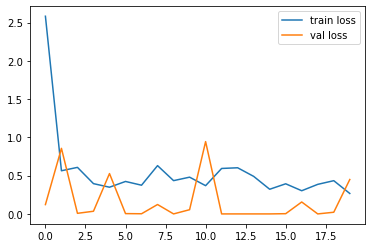

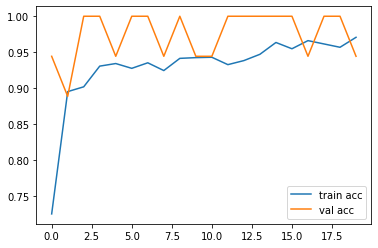

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
#Save the Model
model.save("model_inceptionv3.h5")